In [31]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install yfinance
!{sys.executable} -m pip install fredapi

In [32]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import warnings

from fredapi import Fred

warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [24]:
stock = ['^GSPC','AAPL','MSFT','INTC','IBM']
start = datetime.datetime(2020,1,1)
end = datetime.datetime(2021,4,2)
SP = yf.download(stock,start=start,end = end, interval='1d')

[*********************100%***********************]  5 of 5 completed


In [25]:
SP_close=SP['Close']

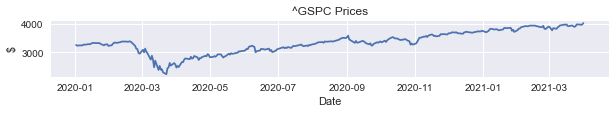

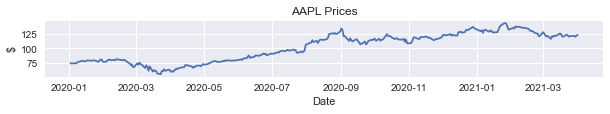

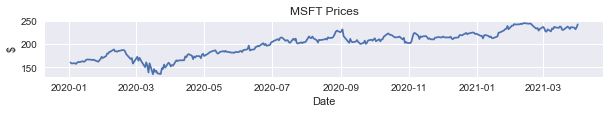

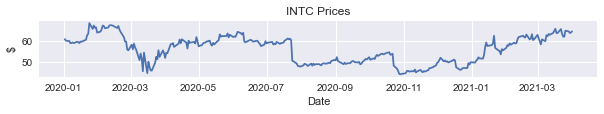

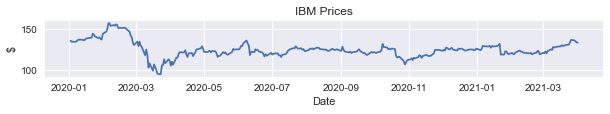

In [30]:
start=1
for i in stock:
    plt.figure(figsize=(10,6))
    plt.subplot(5,1,start)
    plt.plot(SP_close.loc[:,i])
    plt.title(i+' Prices')
    plt.ylabel('$')
    plt.xlabel('Date')
    start=start+1
plt.show()

In [38]:
fred = Fred(api_key='1495abd46f514fa909a930eea724eb13')
interest=fred.get_series('DGS3MO')

In [71]:
risk_free_rate = interest.loc['2021-01-01':'2021-04-01']

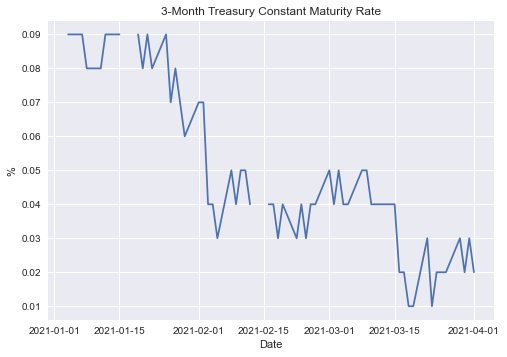

In [72]:
plt.plot(risk_free_rate)
plt.title('3-Month Treasury Constant Maturity Rate')
plt.ylabel('%')
plt.xlabel('Date')
plt.show()